In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

trainDatasetfilePath = 'https://raw.githubusercontent.com/shekharmnnit/ML/main/Customer%20Churn%20Dataset/customer_churn_dataset-training-master.csv'
testDatasetPath= 'https://raw.githubusercontent.com/shekharmnnit/ML/main/Customer%20Churn%20Dataset/customer_churn_dataset-testing-master.csv'
training_df = pd.read_csv(trainDatasetfilePath)
testing_df = pd.read_csv(testDatasetPath)

training_df = training_df.drop(columns = 'CustomerID')
newColumnNames = {col : col.replace(' ','_') for col in training_df.columns}
training_df = training_df.rename(columns = newColumnNames)

testing_df = testing_df.drop(columns = 'CustomerID')
newColumnNames = {col : col.replace(' ','_') for col in testing_df.columns}
testing_df = testing_df.rename(columns = newColumnNames)

print("----Training Data set----------")
print(training_df.head(5).to_string())
print(f"Number of observation in training dataset: {training_df.shape[0]}")
print("Null value count")
print(training_df.isna().sum())
print(f"Training: Total number of rows with null value = {training_df.isna().sum().sum()}")

print("----Testing Data set----------")
print(testing_df.head(5).to_string())
print(f"Number of observation in test dataset: {testing_df.shape[0]}")
print("Null value count")
print(testing_df.isna().sum())
print(f"Testing: Total number of rows with null value = {testing_df.isna().sum().sum()}")

print('-------------------Train Data cleaning-------------------')
print(training_df[training_df['Age'].isna()].to_string()) # row detail with na value
print("199295 row has null value for all the columns, so removing 199295")
training_df = training_df.drop(training_df[training_df['Age'].isna()].index)
print(training_df.isna().sum())

----Training Data set----------
    Age  Gender  Tenure  Usage_Frequency  Support_Calls  Payment_Delay Subscription_Type Contract_Length  Total_Spend  Last_Interaction  Churn
0  30.0  Female    39.0             14.0            5.0           18.0          Standard          Annual        932.0              17.0    1.0
1  65.0  Female    49.0              1.0           10.0            8.0             Basic         Monthly        557.0               6.0    1.0
2  55.0  Female    14.0              4.0            6.0           18.0             Basic       Quarterly        185.0               3.0    1.0
3  58.0    Male    38.0             21.0            7.0            7.0          Standard         Monthly        396.0              29.0    1.0
4  23.0    Male    32.0             20.0            5.0            8.0             Basic         Monthly        617.0              20.0    1.0
Number of observation in training dataset: 440833
Null value count
Age                  1
Gender              

In [3]:
training_df.duplicated().sum()

0

In [4]:
testing_df.duplicated().sum()

0

In [5]:
print(f"Train data duplicated= {training_df.duplicated().sum()}")
print(f"Test data duplicated= {testing_df.duplicated().sum()}")
print("no need to remove duplicate data as duplicate data is 0")

Train data duplicated= 0
Test data duplicated= 0
no need to remove duplicate data as duplicate data is 0


In [6]:
# Down sampling
# Calculate the proportions of classes
train_class_distribution = training_df['Churn'].value_counts()
print("Churn of Train data")
print(train_class_distribution)
test_class_distribution = testing_df['Churn'].value_counts()
print('Churn of test data')
print(test_class_distribution)

train_proportion_0 = train_class_distribution.get(0, 0) / len(training_df['Churn'])
train_proportion_1 = train_class_distribution.get(1, 0) / len(training_df['Churn'])
test_proportion_0 = test_class_distribution.get(0, 0) / len(testing_df['Churn'])
test_proportion_1 = test_class_distribution.get(1, 0) / len(testing_df['Churn'])
print(f'train-churn-0=   {train_proportion_0.round(2)}\n train-churn-1=  {train_proportion_1.round(2)}\n test-churn-0=   {test_proportion_0.round(2)}\n test-churn-1=   {test_proportion_1.round(2)}')


Churn of Train data
Churn
1.0    249999
0.0    190833
Name: count, dtype: int64
Churn of test data
Churn
0    33881
1    30493
Name: count, dtype: int64
train-churn-0=   0.43
 train-churn-1=  0.57
 test-churn-0=   0.53
 test-churn-1=   0.47


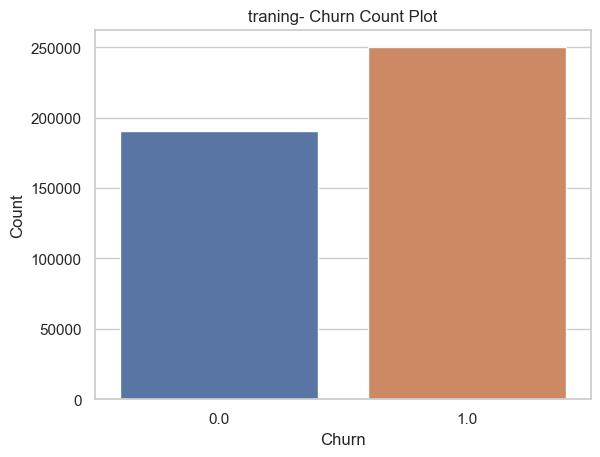

In [7]:
# traning data count plot
sns.set(style="whitegrid")
sns.countplot(data=training_df, x="Churn")

# You can customize the plot further
plt.title("traning- Churn Count Plot")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


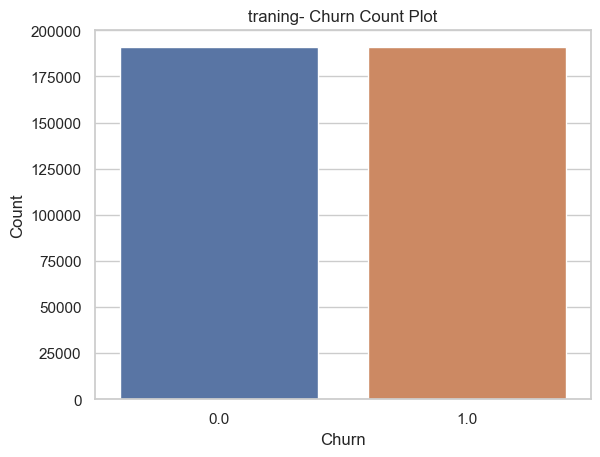

In [8]:
# remove observation train
churn_1_rows = training_df[training_df['Churn'] == 1]
random_sample = churn_1_rows.sample(n=59166, random_state=5508)
training_df = training_df.drop(random_sample.index)

# traning data count plot
sns.set(style="whitegrid")
sns.countplot(data=training_df, x="Churn")

# You can customize the plot further
plt.title("traning- Churn Count Plot")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

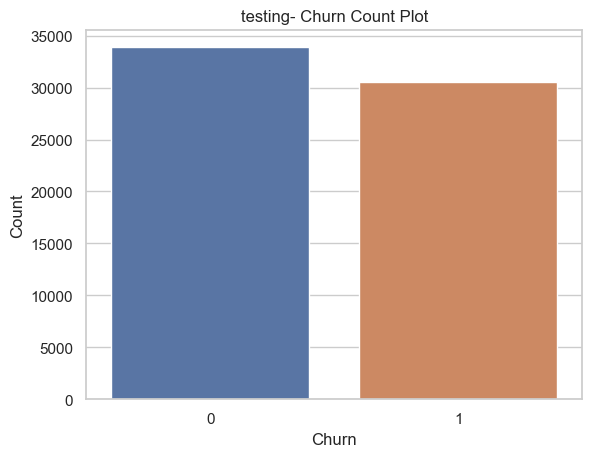

In [9]:
# test data count plot
sns.set(style="whitegrid")
sns.countplot(data=testing_df, x="Churn")

# You can customize the plot further
plt.title("testing- Churn Count Plot")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


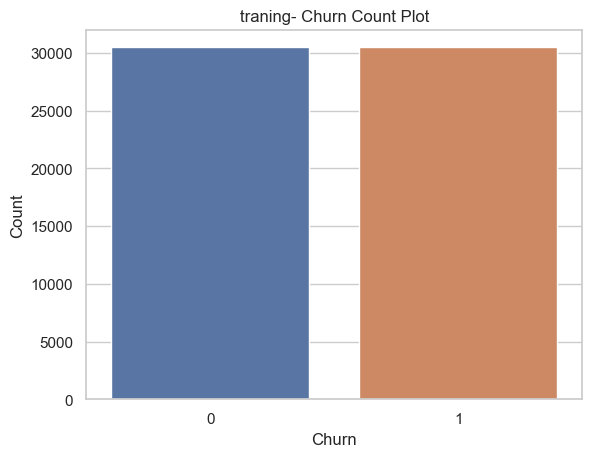

In [10]:
# remove observation from test
churn_1_rows = testing_df[testing_df['Churn'] == 0]
random_sample = churn_1_rows.sample(n=3388, random_state=5508)
testing_df = testing_df.drop(random_sample.index)

# traning data count plot
sns.set(style="whitegrid")
sns.countplot(data=testing_df, x="Churn")

# You can customize the plot further
plt.title("traning- Churn Count Plot")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

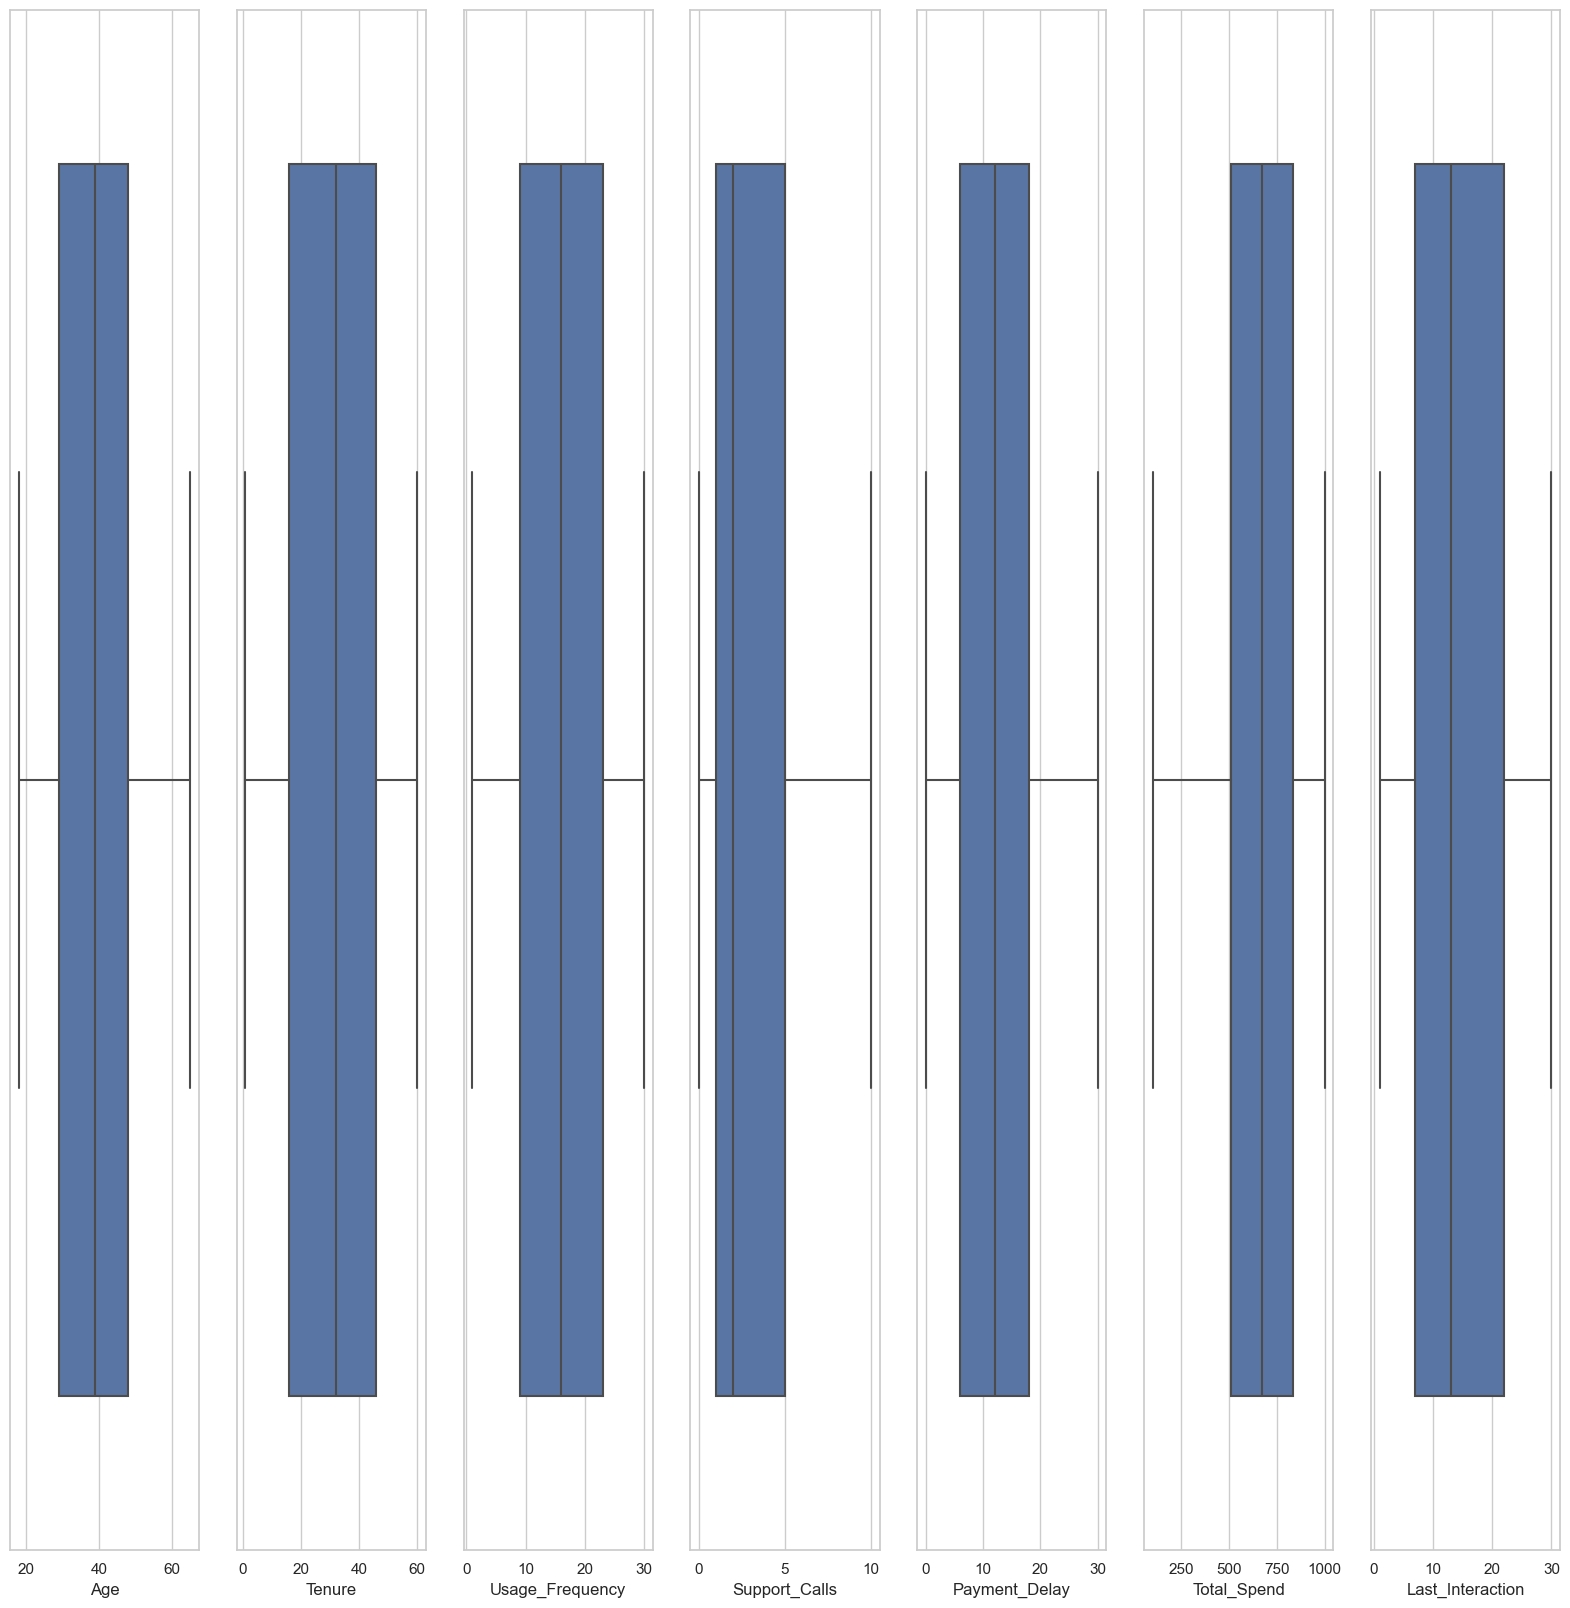

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable named 'df'
# Features to be checked for outliers
# features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend']

# Create subplots for each feature
plt.figure(figsize=(20, 20)) 
for i,feature in enumerate(['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']):
     # Adjust the figure size as needed
    plt.subplot(1,7,i+1)
    sns.boxplot(x=training_df[feature])
    # plt.title(f'Boxplot for {feature}')
plt.show()

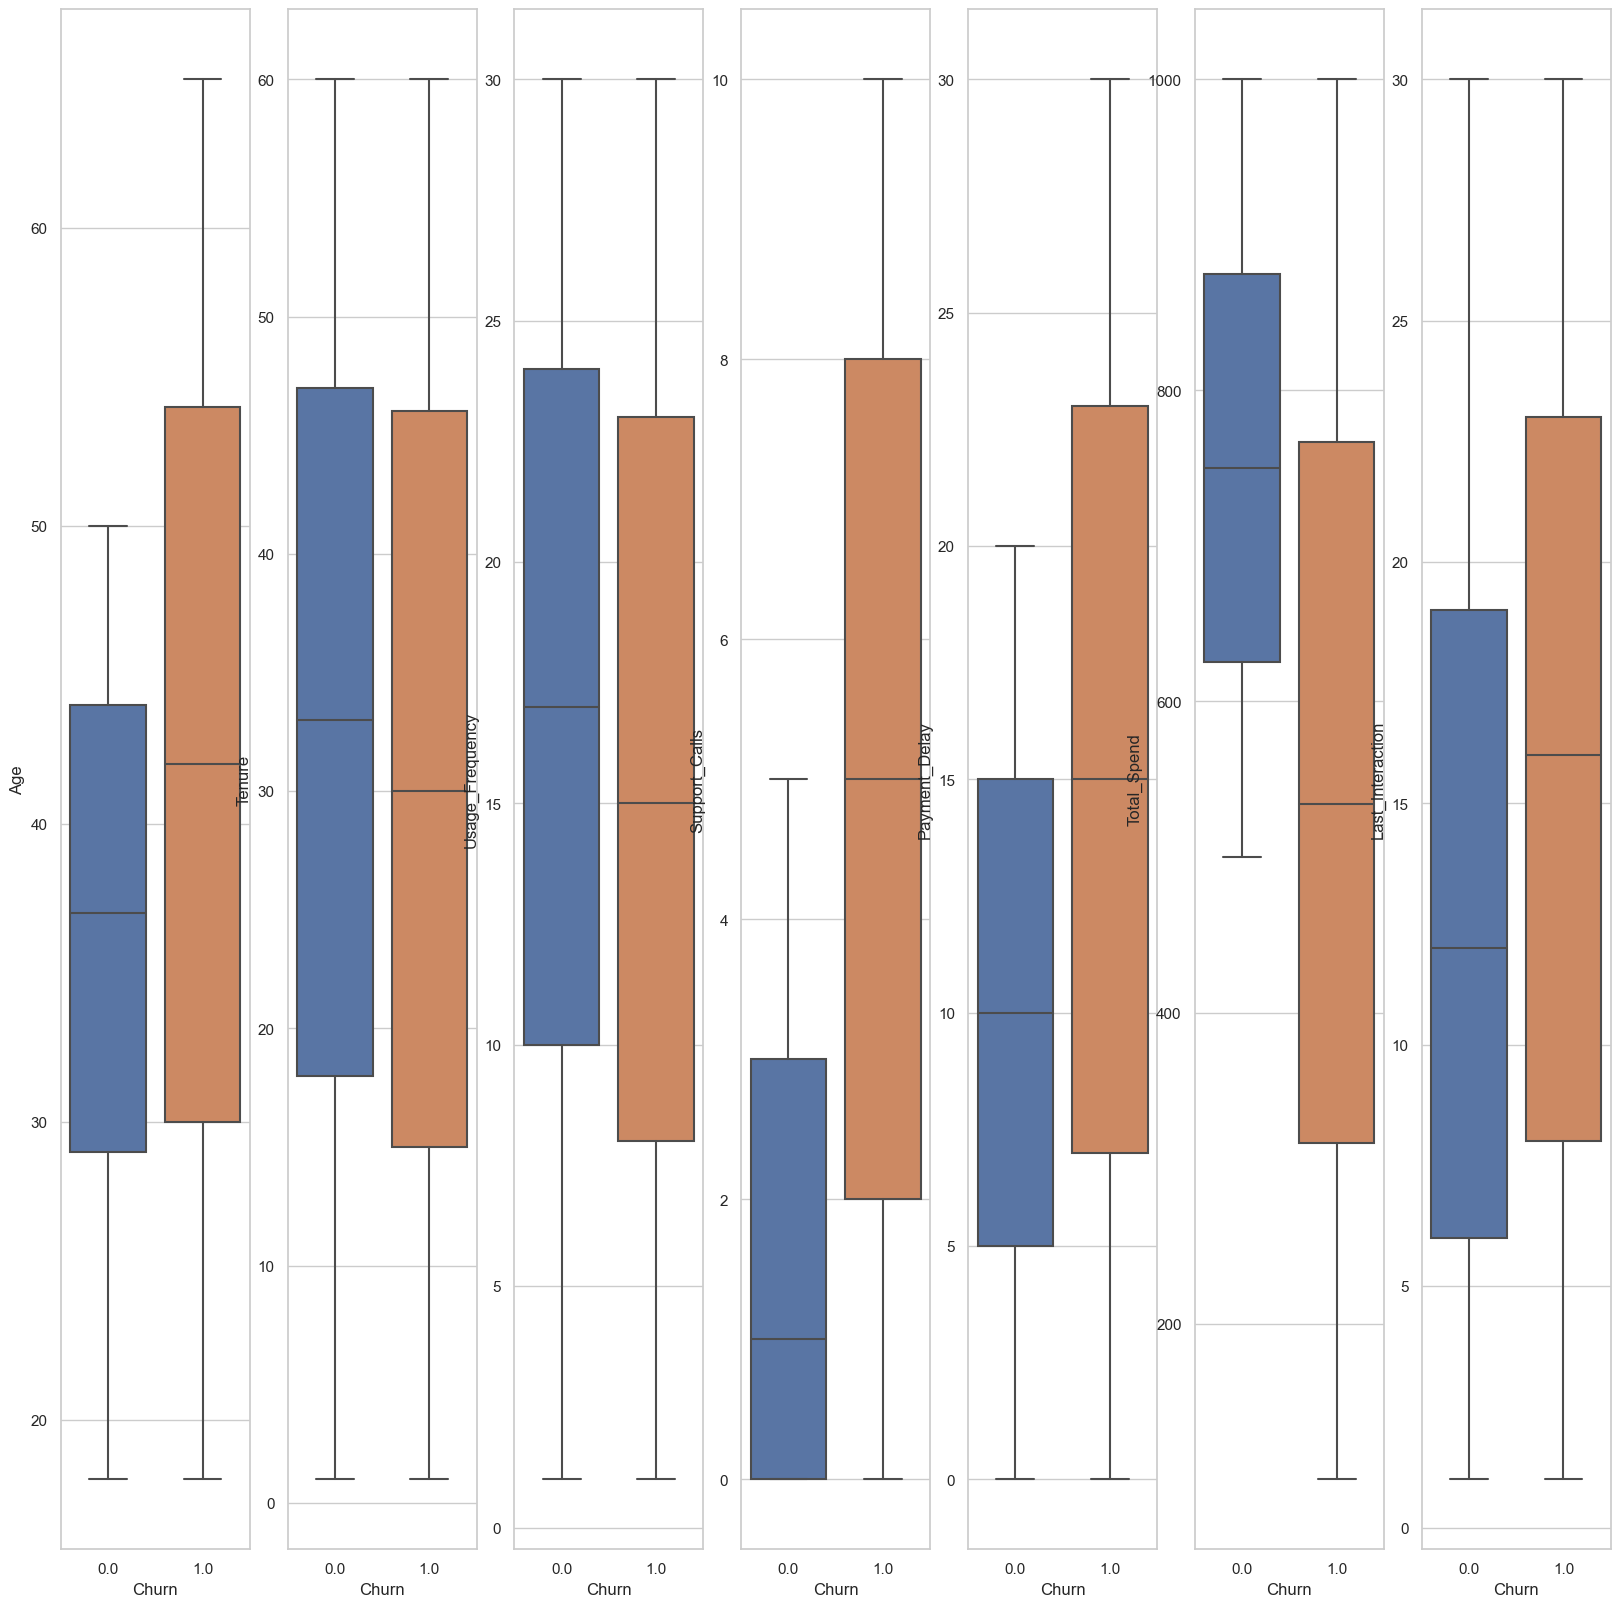

In [12]:
# Create combine subplots for each feature
plt.figure(figsize=(20, 20)) 
for i,feature in enumerate(['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']):
     # Adjust the figure size as needed
    plt.subplot(1,7,i+1)
    sns.boxplot(training_df,x='Churn',y=feature)
    # plt.title(f'Boxplot for {feature}')
plt.show()

In [13]:
# Covariance Matrix display
def Standardized(dataframe):
    return (dataframe - dataframe.mean()) / dataframe.std()
encodingTrainDFForHitmap = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
standardizedTrainDfForHitmap= Standardized(encodingTrainDFForHitmap[{'Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction'}])
standardizedTrainDfForHitmap=pd.concat([standardizedTrainDfForHitmap,encodingTrainDFForHitmap[{'Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly','Churn'}]], axis=1)

covariance_matrix = standardizedTrainDfForHitmap.cov()
# plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Sample Covariance Matrix Heatmap')
plt.show()


TypeError: Passing a set as an indexer is not supported. Use a list instead.

In [ ]:
    # Correlation coefficients Matrix
    Correlation_matrix = standardizedTrainDfForHitmap.corr()
    # plt.figure(figsize=(10, 8))
    sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Sample Correlation Matrix Heatmap')
    plt.show()

In [ ]:
# Dimensionality reduction/feature selection

In [ ]:
# Random Forest Analysis
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import pandas as pd
# def Standardized(dataframe):
#     return (dataframe - dataframe.mean()) / dataframe.std()

encodingTrainDF = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
standardizedTrainDf= Standardized(encodingTrainDF[{'Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction'}])
standardizedTrainDf=pd.concat([standardizedTrainDf,encodingTrainDF[{'Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly'}]], axis=1)

# X_train= standardizedTrainDf.drop(columns=['Churn'])
X_train = standardizedTrainDf
X_train = sm.add_constant(X_train)
y_train = training_df['Churn']


encodingTestDF = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
standardizedTestDf= Standardized(encodingTestDF[{'Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction'}])
standardizedTestDf=pd.concat([standardizedTestDf,encodingTestDF[{'Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly'}]], axis=1)

X_test= standardizedTestDf
X_test = sm.add_constant(X_test)
y_test = testing_df['Churn']

# print(X_test.head(5).to_string())

In [ ]:
# building RandomForestRegressor model
rf= RandomForestRegressor(random_state=5805)
rf.fit(X_train,y_train)
featureImportancs= rf.feature_importances_

indices= np.argsort(featureImportancs)
sortedFeatureImportancs = featureImportancs[indices]
sortedFeatureName= X_train.columns[indices]

In [ ]:
# building RandomForestRegressor model
# plot
plt.figure(figsize=(12,8))
plt.barh(range(sortedFeatureImportancs.size), sortedFeatureImportancs)
plt.yticks(range(sortedFeatureName.size), sortedFeatureName)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance vs Feature')
plt.grid(True)
plt.show()

In [ ]:
# building RandomForestRegressor model
threshold= 0.0015
selectedFeatures = [sortedFeatureName[i] for i, importance in enumerate(sortedFeatureImportancs) if importance >= threshold]
eliminatedFeatures = [sortedFeatureName[i] for i,importance in enumerate(sortedFeatureImportancs) if importance < threshold]
print("selected features= ", selectedFeatures)
print("eliminated Features= ", eliminatedFeatures)

In [ ]:
# PCA-Principal Component Analysis
# X_train is standardized
from sklearn.decomposition import PCA
import copy
pcaDatasetDF=copy.deepcopy(X_train)
pca=PCA()
pca.fit(pcaDatasetDF)
pcaCoordinate=pca.transform(pcaDatasetDF)
EVR= pca.explained_variance_ratio_
CVR = np.cumsum(EVR) # cumulative explained variance
numComponents = np.argmax(CVR >= 0.95) + 1
print("number of Principal Component = "+ str(numComponents))

In [ ]:
# PCA-Principal Component Analysis
pca=PCA(numComponents)
pca.fit(pcaDatasetDF)
pcaCoordinate=pca.transform(pcaDatasetDF)
# print(pcaCoordinate)


In [ ]:
# PCA-Principal Component Analysis
newPCAdf = pd.DataFrame(pcaCoordinate)
# print(newPCAdf.shape[1])
newColumnNames = {col : 'Component-'+ str(col+1) for col in newPCAdf.columns}
newPCAdf = newPCAdf.rename(columns = newColumnNames)
print(newPCAdf.head(5).to_string())

In [ ]:
# PCA-Principal Component Analysis
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, pcaDatasetDF.shape[1]+ 1), CVR, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# plt.figure(figsize=(8, 6))
# plt.plot(np.arange(1, pcaDatasetDF.shape[1]+ 1), CVR, marker='o')
# plt.xlabel('Number of Features')
# plt.ylabel('Cumulative Explained Variance')
# plt.axhline(y=0.95, color='red', label='95% Threshold')
# plt.axvline(x=numComponents, color='green', label=f'{numComponents} Features')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# SVD-Singular Value Decomposition Analysis
# X_train is standardized
from sklearn.decomposition import TruncatedSVD
svdDatasetDF=copy.deepcopy(X_train)
svd=TruncatedSVD(svdDatasetDF.shape[1])
svd.fit(svdDatasetDF)
svdCoordinate=svd.transform(svdDatasetDF)

EVR= svd.explained_variance_ratio_
CVR = np.cumsum(EVR) # cumulative explained variance
numComponents = np.argmax(CVR >= 0.95) + 1
print("number of Component = "+ str(numComponents))

In [ ]:
# SVD-Singular Value Decomposition Analysis
svd=TruncatedSVD(numComponents)
svd.fit(svdDatasetDF)
svdCoordinate=svd.transform(svdDatasetDF)

In [ ]:
# SVD-Singular Value Decomposition Analysis

newSVDdf = pd.DataFrame(svdCoordinate)
newColumnNames = {col: 'Component-' + str(col + 1) for col in newSVDdf.columns}
newSVDdf = newSVDdf.rename(columns=newColumnNames)
print(newSVDdf.head().to_string())

# df_svd = pd.DataFrame(pcaCoordinate, columns=[f'Component_{i+1}' for i in range(pcaCoordinate.shape[1])])
# print(df_svd.head(5))

In [ ]:
# SVD-Singular Value Decomposition Analysis
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, newSVDdf.shape[1]+ 1), CVR, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame named 'df' containing your dataset
# Select the features for which you want to calculate VIF
# Exclude non-numeric columns and the target variable 'Churn'


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Sort the features by VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

# Print the VIF values
print(vif_data)


In [ ]:
# VIF
# plot
plt.figure(figsize=(12,8))
plt.barh(range(sortedFeatureImportancs.size), sortedFeatureImportancs)
plt.yticks(range(sortedFeatureName.size), sortedFeatureName)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance vs Feature')
plt.grid(True)
plt.show()